### K=2

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math

In [39]:
x_points = np.arange(-2, 2.05, 0.1)
y_points = np.arange(-2, 2.05, 0.1)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)

In [40]:
xy_map = np.zeros((len(x_mesh), len(y_mesh)))
landmark = np.zeros((2,4))
check = 1

x_t = 0.5
y_t = 0.5
land_x = [1, -1, 0, 0]
land_y = [0, 0, 1, -1]
K = 2

sig_i = 0.1
sig_x = 0.15
sig_y = 0.15

In [41]:
def cal_dti(x_t_d, y_t_d, x_i_d, y_i_d):
    dti = math.sqrt((x_t_d - x_i_d)**2 + (y_t_d - y_i_d)**2)
    return dti

In [42]:
for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        likelihood = 0
        for q in range(K):
            n_i = np.random.normal(0, sig_i**2)
            r_i = cal_dti(x_t, y_t, land_x[q], land_y[q]) + n_i
            likelihood = likelihood + ((r_i - cal_dti(land_x[q], land_y[q], x_mesh[i,j], y_mesh[i,j]))**2)/(sig_i**2)
        prior = (x_mesh[i,j]**2)/(sig_x**2) + (y_mesh[i,j]**2)/(sig_y**2)
        xy_map[i, j] = likelihood + prior
        if check == 1:
            mini = xy_map[i,j]
            check = 2
        if xy_map[i, j] < mini:
            mini = xy_map[i,j]
            mini_x = x_mesh[i,j]
            mini_y = y_mesh[i,j]

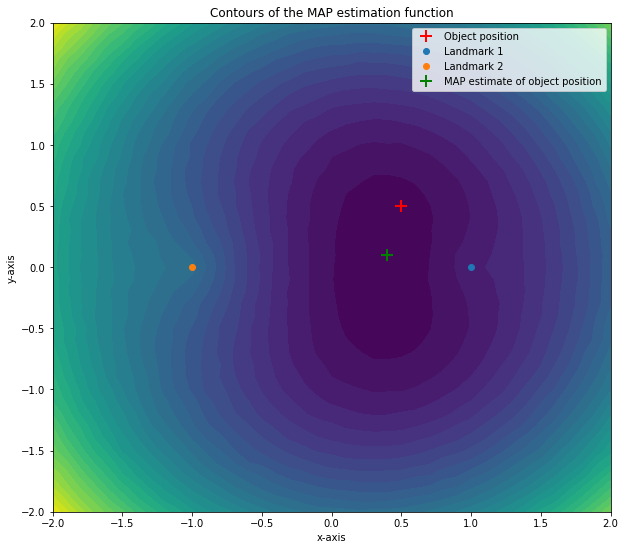

In [43]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(1, 1, 1)
cs = ax.contourf(x_mesh, y_mesh, xy_map, levels = 30)
ax.plot(x_t, y_t, 'r+', markeredgewidth = 2, markersize = 12, label = 'Object position')
for q in range(K):
    ax.plot(land_x[q], land_y[q], 'o', label = 'Landmark {}'.format(q+1))
ax.plot(mini_x, mini_y, 'g+', markeredgewidth = 2, markersize = 12, label = 'MAP estimate of object position')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Contours of the MAP estimation function')
ax.legend()
plt.show()